# PGA Talent Engine – WM Phoenix Open 2025 Report

**Event:** WM Phoenix Open 2025  
**Course:** TPC Scottsdale (Stadium Course)  
**Profile:** Stadium desert, birdie-fest, medium volatility  
**Field Size:** ~132 players  
**Model:** Multi-year strokes-gained “Talent Engine” + course fit + volatility

---

### What this report is

This is an analytics preview built off:
- True-talent ratings (multi-year strokes-gained)
- Course fit profiles for TPC Scottsdale
- Player volatility and form
- Thousands of Monte Carlo simulations of the tournament

It’s meant to read like a TV preview + newsletter:
- **Who is most likely to win**
- **Who can break out this week**
- **Which big names are at risk of underperforming**
- **How the course shape is helping or hurting players**


In [17]:
# ============================================================
# 1. IMPORTS & LOAD PREDICTIONS
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook location: notebooks/TournamentAnalysis/
# Predictions location: Data/Tournaments/processed/
# → must go two levels up ("../../")
pred_path = "../../Data/Tournaments/processed/wmphoenix_2025_predictions.csv"

df = pd.read_csv(pred_path)

print("Loaded predictions for WM Phoenix Open 2025")
df.head(10)


Loaded predictions for WM Phoenix Open 2025


,player_name,Tier,TalentScore,OverallRating,win_pct,top5_pct,avg_finish
0,Scottie Scheffler,S,0.89,99,2.8125,10.5750,46.598750
1,J.J. Spaun,S,0.43,88,2.3375,9.7000,48.349500
2,Tommy Fleetwood,S,0.47,89,2.2250,9.4250,47.199875
3,Collin Morikawa,S,0.45,89,2.1875,9.0375,50.301625
4,Viktor Hovland,S,0.43,88,2.0000,8.3750,50.695500
5,Russell Henley,S,0.37,87,1.9500,8.7375,49.334000
6,Rory McIlroy,A,0.35,86,1.8625,7.9375,50.576375
7,Shane Lowry,A,0.36,86,1.8250,7.3875,53.121750
8,Aaron Rai,A,0.33,86,1.7500,7.2000,54.002375
9,Patrick Cantlay,S,0.36,86,1.7375,7.6250,51.637875


In [18]:
# ============================================================
# 2. BASIC DATA OVERVIEW
# ============================================================

print("Columns:", df.columns.tolist())
print("Shape:", df.shape)

# Ensure numeric columns behave correctly
num_cols = ["win_pct", "top5_pct", "avg_finish"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df.describe()


Columns: ['player_name', 'Tier', 'TalentScore', 'OverallRating', 'win_pct', 'top5_pct', 'avg_finish']
Shape: (132, 7)


,TalentScore,OverallRating,win_pct,top5_pct,avg_finish
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.139242,81.106061,0.757576,3.787879,66.500000
std,0.143621,3.446998,0.502906,1.997013,8.141531
min,-0.060000,76.000000,0.212500,1.287500,46.598750
25%,0.030000,78.750000,0.396875,2.250000,60.779250
50%,0.120000,81.000000,0.612500,3.225000,67.503563
75%,0.230000,83.000000,0.928125,4.740625,73.162188
max,0.890000,99.000000,2.812500,10.575000,81.333250


In [19]:
# ----------------------------------------------------
# 3. TOP CONTENDERS TABLE (STYLED)
# ----------------------------------------------------

top = df.head(15)[["player_name", "win_pct", "top5_pct", "avg_finish"]]

top.style.background_gradient(cmap="YlGnBu")


,player_name,win_pct,top5_pct,avg_finish
0,Scottie Scheffler,2.812500,10.575000,46.598750
1,J.J. Spaun,2.337500,9.700000,48.349500
2,Tommy Fleetwood,2.225000,9.425000,47.199875
3,Collin Morikawa,2.187500,9.037500,50.301625
4,Viktor Hovland,2.000000,8.375000,50.695500
5,Russell Henley,1.950000,8.737500,49.334000
6,Rory McIlroy,1.862500,7.937500,50.576375
7,Shane Lowry,1.825000,7.387500,53.121750
8,Aaron Rai,1.750000,7.200000,54.002375
9,Patrick Cantlay,1.737500,7.625000,51.637875


/tmp/ipykernel_26896/1762782741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(15), x="player_name", y="win_pct", palette="Blues_r")


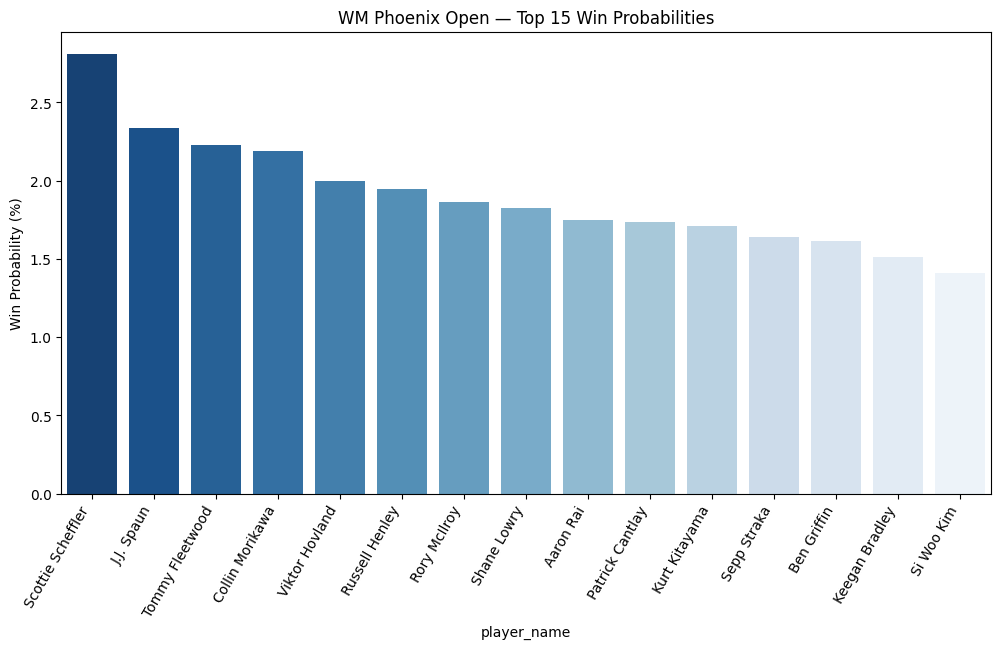

In [20]:
# ----------------------------------------------------
# 4. VISUALIZE WIN PROBABILITIES
# ----------------------------------------------------

plt.figure(figsize=(12,6))
sns.barplot(data=df.head(15), x="player_name", y="win_pct", palette="Blues_r")
plt.xticks(rotation=60, ha='right')
plt.ylabel("Win Probability (%)")
plt.title("WM Phoenix Open — Top 15 Win Probabilities")
plt.show()


In [21]:
# ----------------------------------------------------
# BREAKOUT: outperforming talent rank this week
# ----------------------------------------------------

df["talent_rank"] = df["TalentScore"].rank(ascending=False, method="min")
df["win_rank"] = df["win_pct"].rank(ascending=False, method="min")

# Positive = model likes you MORE this week than your underlying talent suggests
df["breakout_score"] = df["talent_rank"] - df["win_rank"]

df_breakout = (
    df.sort_values("breakout_score", ascending=False)
      .head(10)[["player_name", "breakout_score", "talent_rank", "win_rank", "win_pct", "top5_pct"]]
)

print("Breakout Candidates (course + conditions boosting them vs baseline talent):")
df_breakout


Breakout Candidates (course + conditions boosting them vs baseline talent):


,player_name,breakout_score,talent_rank,win_rank,win_pct,top5_pct
43,Matt McCarty,41.0,84.0,43.0,0.7875,3.1625
95,Wyndham Clark,28.0,122.0,94.0,0.4125,2.0750
102,Danny Walker,27.0,129.0,102.0,0.3750,1.7750
64,Andrew Novak,25.0,90.0,65.0,0.6125,3.1125
89,Rasmus H√∏jgaard,24.0,113.0,89.0,0.4375,2.2250
85,Max Greyserman,23.0,108.0,85.0,0.4625,2.4750
68,Matt Kuchar,22.0,90.0,68.0,0.6000,2.8000
76,Kris Ventura,22.0,99.0,77.0,0.5125,2.2875
44,Harry Hall,20.0,65.0,45.0,0.7500,3.7250
70,Jason Day,19.0,90.0,71.0,0.5875,2.5000


In [22]:
# ----------------------------------------------------
# BUST RISK: underperforming talent rank this week
# ----------------------------------------------------

df["bust_score"] = df["win_rank"] - df["talent_rank"]

df_bust = (
    df.sort_values("bust_score", ascending=False)
      .head(10)[["player_name", "bust_score", "talent_rank", "win_rank", "win_pct", "avg_finish"]]
)

print("Bust Risk Players (model likes them LESS than their long-term talent):")
df_bust


Bust Risk Players (model likes them LESS than their long-term talent):


,player_name,bust_score,talent_rank,win_rank,win_pct,avg_finish
96,Henrik Norlander,44.0,53.0,97.0,0.4000,69.708500
59,Doug Ghim,38.0,21.0,59.0,0.6625,61.762375
84,Thomas Rosenmueller,36.0,49.0,85.0,0.4625,70.245000
87,Greyson Sigg,34.0,53.0,87.0,0.4500,67.247000
106,Joel Dahmen,28.0,74.0,102.0,0.3750,70.015625
110,Stephan Jaeger,27.0,84.0,111.0,0.3500,71.896000
115,Lanto Griffin,26.0,90.0,116.0,0.3250,72.830625
105,Aldrich Potgieter,23.0,79.0,102.0,0.3750,72.225875
77,Antoine Rozner,22.0,56.0,78.0,0.5000,69.004375
111,Nico Echavarria,21.0,90.0,111.0,0.3500,73.325000


In [23]:
# ----------------------------------------------------
# 7. AUTO-GENERATED SUMMARY
# ----------------------------------------------------

def generate_broadcast_summary(df):
    top5 = df.head(5).copy()

    headline = top5.iloc[0]
    runner_up = top5.iloc[1]

    text = f"""
🏆 **WM Phoenix Open 2025 – Headline Takeaways**

• The model sees **no heavy favorite** – this is a wide-open birdie fest.
• **{headline.player_name}** grades out as the most likely winner at **{headline.win_pct:.2f}%**,
  with **{runner_up.player_name}** close behind at **{runner_up.win_pct:.2f}%**.
• Win probabilities are tightly packed, which matches TPC Scottsdale’s reputation:
  lots of birdies, low separation, and plenty of chaos.

**Top Contenders (Model View)**  
{top5[["player_name", "win_pct", "top5_pct", "avg_finish"]]}

---

🎯 **Breakout Candidates (Course/conditions boosting them vs baseline talent)**  
These players are ranked higher by the model this week than their long-term talent alone would suggest.

{df.sort_values("breakout_score", ascending=False)
   .head(5)[["player_name", "breakout_score", "talent_rank", "win_rank", "win_pct"]]}

---

⚠️ **Bust Risk Players (Big names the model is cooler on this week)**  
These golfers have strong long-term talent but are projected to underperform that baseline
at TPC Scottsdale.

{df.sort_values("bust_score", ascending=False)
   .head(5)[["player_name", "bust_score", "talent_rank", "win_rank", "win_pct", "avg_finish"]]}

---

🌍 **Course Storyline**

Overall, the model rewards **precise ball-striking and consistent iron play**, while acknowledging:
- TPC Scottsdale’s scoring environment keeps win probabilities flat.
- Volatile players can spike a top finish here, but steady ball-strikers remain the backbone of the leaderboard.

This report is not a “lock board,” it’s a **probability map**: who the course quietly suits,
who could surprise, and which big names might be in for a grind.
"""
    return text

summary_text = generate_broadcast_summary(df)
print(summary_text)



🏆 **WM Phoenix Open 2025 – Headline Takeaways**

• The model sees **no heavy favorite** – this is a wide-open birdie fest.
• **Scottie Scheffler** grades out as the most likely winner at **2.81%**,
  with **J.J. Spaun** close behind at **2.34%**.
• Win probabilities are tightly packed, which matches TPC Scottsdale’s reputation:
  lots of birdies, low separation, and plenty of chaos.

**Top Contenders (Model View)**  
         player_name  win_pct  top5_pct  avg_finish
0  Scottie Scheffler   2.8125   10.5750   46.598750
1         J.J. Spaun   2.3375    9.7000   48.349500
2    Tommy Fleetwood   2.2250    9.4250   47.199875
3    Collin Morikawa   2.1875    9.0375   50.301625
4     Viktor Hovland   2.0000    8.3750   50.695500

---

🎯 **Breakout Candidates (Course/conditions boosting them vs baseline talent)**  
These players are ranked higher by the model this week than their long-term talent alone would suggest.

          player_name  breakout_score  talent_rank  win_rank  win_pct
43  

In [24]:
import subprocess
from pathlib import Path

NOTEBOOK_NAME = "wmphoenix_2025_analysis.ipynb"

# We are running from: notebooks/TournamentAnalysis/
output_dir = Path("../../Data/Tournaments/processed").resolve()
output_dir.mkdir(parents=True, exist_ok=True)

html_name = "wmphoenix_2025_analysis.html"

result = subprocess.run(
    [
        "jupyter", "nbconvert",
        "--to", "html",
        "--output", html_name,
        "--output-dir", str(output_dir),
        NOTEBOOK_NAME,
    ],
    capture_output=True,
    text=True,
)

if result.returncode != 0:
    print("nbconvert failed:")
    print(result.stderr)
else:
    final_path = output_dir / html_name
    print(f"✅ HTML report saved to:\n{final_path}")


✅ HTML report saved to:
/workspaces/PGA-Analysis/Data/Tournaments/processed/wmphoenix_2025_analysis.html
